Ensembles of Decision Trees
===

Ensembles are methods that combine multiple machine learning models to create more powerful methods.

Random Forests
---

A Random Forest is essentially a collection of decision trees, with each tree being slightly different.  Using many trees which work well and overfit in different ways, overfitting can be reduced by averaging their results.

The trees in a random forest can be randomized in two ways: the selection of the data points, and the selection ofthe features in each split test.

**Building Random Forests**

Trees are built independently, taking a _bootstrap sample_ by repeatedly drawing an example randomly with replacement.  The result is a dataset as big as the original, but with some data points missing (~1/3) and others duplicated.

Then, instead of looking for the best test for each tree, a random subset of the features is selected and it looks for the best possible test involving one of the selected features.  Each tree selects from a different subset of features.

Together, these two mechanisms ensure that all the trees in the random forest are different.

Parameters for `RandomForestRegressor` and `RandomForestClassifier`:
  - `n_estimators` (number of trees, larger is always better)
  - `n_samples` (size of bootstap sample)
  - `max_features` (controls feature selection, good rule is sqrt of `n_features` for classification and `log2(n_features)` for regression)
  - `max_depth` (pre-pruning)
  
A high `max_features` (close to `n_features`) means that trees in the random forest will be similar, and will be able to fit the data easily, using the most distinctive features.

A low `max_features`, (close to 1) means that the trees in the random forest will be quite different, and that each tree may need to be very deep in order to fit the data well.

**Making a prediction**

Makes a prediction for every tree in the forest.  For regression, results are averaged for final prediction.  For classification, a "soft voting" strategy is used, meaning each tree makes a "soft" prediction, providing a probability for each possible output label.  The probabilities by all the trees are averaged, and the class with the highest probability is predicted.

**Analyzing**

Apply a random forest consisting of five trees to the two moons dataset

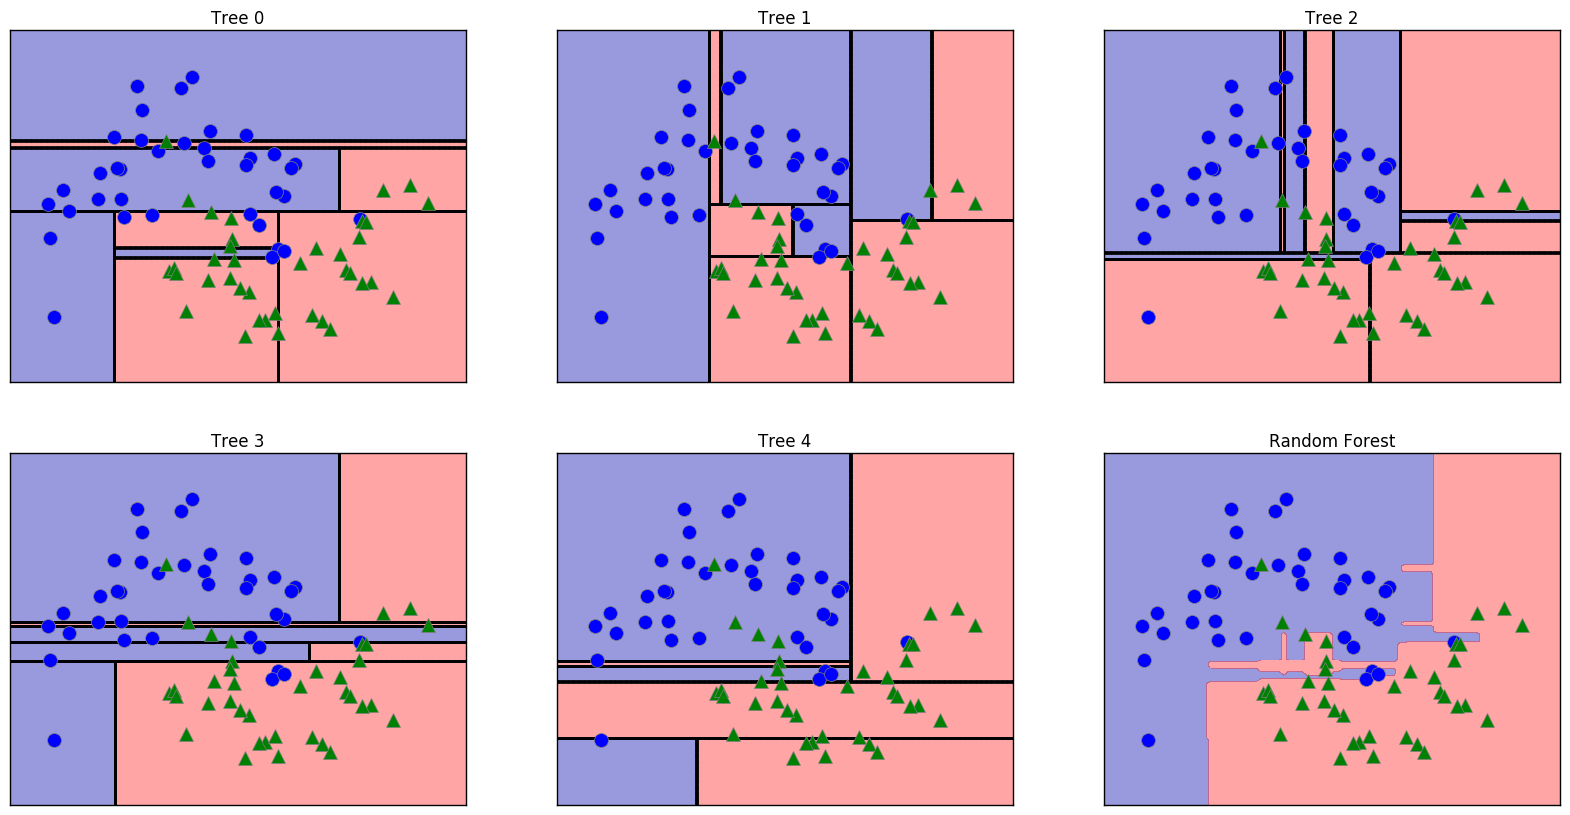

In [3]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)

axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Applied to the breast cancer dataset:

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


The random forest gives an accuracy of 97%, better than the linear models or a single decision tree, without tuning any parameters.

**Plotting feature importances**

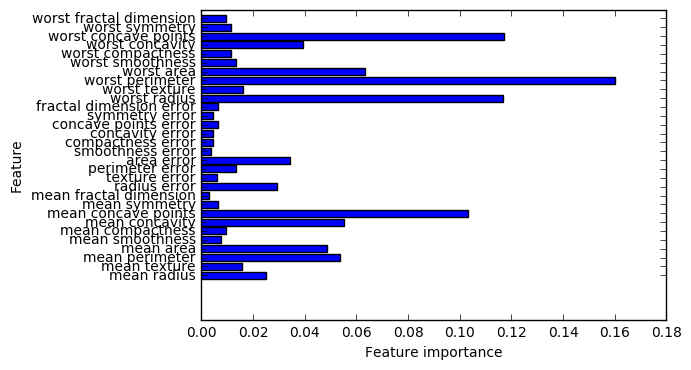

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(forest)

Random forests for regression and classification are currently among the most widely used machine learning methods.

**Advantages**
  - Work well without heavy tuning of the parameters
  - Doesn't require scaling of the data
  - Essentially, shares all of the benefits of decision trees, while making up for some deficiencies
  - Building the trees can be parallized (`n_jobs` parameter: -1 to use all available)
  
One reason to use a single decision tree is if you need a compact representation of the decision-making process.

If you need reproducible results, it is important to fix the random state or set the number of trees to a very large number.

**Disadvantages**
  - Don't perform well on very high-dimensional, sparse data (such as text) (for these models, linear may perform better)
  - Require more memory and are slower to train and predict than linear models
  
Gradient-boosted Regression Trees/Gradient-boosting Machines
---

Can be used for regression or classification.  Builds trees in a serial manner, where each subsequent tree tries to correct the mistakes of the previous tree.  By default, there is no randomization; instead, strong pre-pruning is used.  Often produce very shallow trees (depth 1-5), which makes the model smaller in terms of memory, and makes predictions faster.

Combines many weak learners (shallow trees).  Generally, a bit more sensitive to parameter tuning than random forest, and can provide better accuracy if the parameters are set correctly.

The `learning_rate` controls how strongly each tree tries to correct the mistakes of the previous trees.  A higher learning rate means stronger corrections and more complex models.

Adding more trees through `n_estimators` also increases model complexity.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


Training set accuracy is 100%, which indicates likely overfitting.  To reduce overfitting, apply stronger pre-pruning by limiting the maximum depth or lowering the learning rate

In [10]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [11]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


**Visualizing feature importance**

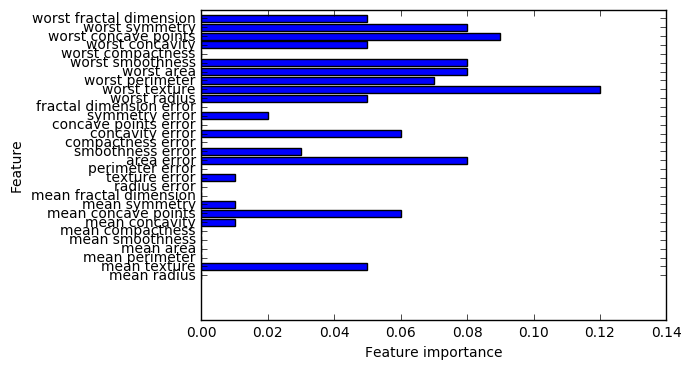

In [13]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

As both gradient boosting and random forests perform well on similar kinds of data, a common approach is to first try random forests, which work quite robustly.  If random forests work well but prediction time is at a premium or it is important to squeeze out the last percentage of accuracy, moving to gradient boosting often helps.

When applying to a large problem, look into `xgboost` package and its Python interface.

**Disadvantages**
  - Require careful tuning
  - May take a long time to train
  - Does not work well on high-dimensional, sparse data
  
 A lower `learning_rate` often means that more `n_estimators` (trees) are required to build a model of similar complexity.
 
In contrast to random forest, higher `n_estimators` is not always better, and leads to higher model complexity (danger of overfitting).  It is common to fit `n_estimators` based on time/memory budget, and then search over different `learning_rates`.

The other important parameter is `max_depth`/`max_leaf_nodes` to reduce the complexity of each tree.  Typically, `max_depth` is set very low for gradient boosted models (<= 5).